In [1]:
import pandas as pd
import requests
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

import datetime

pd.options.mode.chained_assignment = None


In [2]:
# read from "https://www.redfin.com/news/data-center/" dataset which was downloaded into a csv file and then filtered only for years 2018,2019,2020
data_df = pd.read_csv('covid_housing_data_2018_2019_2020.csv')
# drop the first unnamed column from excel
data_df = data_df.drop(['Unnamed: 0'], axis=1)
# list 5 rows of dataframe
data_df.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy,total_new_listings
0,25540,-2,"Hartford, CT metro area",metro,2018-06-11,2018-06-17,1 weeks,403.0,0.092141,403.0,...,-0.008439,132.596685,-0.033132,14.0,-27.0,344.0,NaN,0.048132,NaN,500.0
1,257,5,"Hot Spring County, AR",county,2018-03-05,2018-03-11,1 weeks,6.0,0.500000,6.0,...,-0.428439,51.972227,-0.343256,0.0,-1.0,4.0,-0.428571,0.038835,-0.021510,6.0
2,25540,-2,"Hartford, CT metro area",metro,2018-07-23,2018-07-29,1 weeks,406.0,-0.169734,406.0,...,0.045455,135.910371,0.000647,16.0,2.0,326.0,NaN,0.046819,NaN,387.0
3,25540,-2,"Hartford, CT metro area",metro,2020-12-14,2020-12-20,1 weeks,440.0,0.176471,440.0,...,0.165924,142.611028,0.102003,12.0,-0.5,80.0,-0.245283,0.023141,0.001658,216.0
4,257,5,"Hot Spring County, AR",county,2020-10-26,2020-11-01,1 weeks,6.0,2.000000,6.0,...,-0.054272,83.814092,0.405883,15.5,2.0,NaN,NaN,NaN,NaN,2.0


In [3]:
# list columns
data_df.columns

Index(['region_id', 'region_type_id', 'region_name', 'region_type',
       'period_begin', 'period_end', 'duration', 'total_homes_sold',
       'total_homes_sold_yoy', 'average_homes_sold', 'average_homes_sold_yoy',
       'total_homes_sold_with_price_drops',
       'total_homes_sold_with_price_drops_yoy',
       'average_homes_sold_with_price_drops',
       'average_homes_sold_with_price_drops_yoy',
       'percent_homes_sold_with_price_drops',
       'percent_homes_sold_with_price_drops_yoy', 'median_sale_price',
       'median_sale_price_yoy', 'median_sale_ppsf', 'median_sale_ppsf_yoy',
       'median_days_to_close', 'median_days_to_close_yoy', 'price_drops',
       'price_drops_yoy', 'percent_active_listings_with_price_drops',
       'percent_active_listings_with_price_drops_yoy', 'total_new_listings'],
      dtype='object')

In [4]:
# select 4 weeks duration, county, and NY state
ny_county_data_df = data_df[(data_df['duration'] == '4 weeks') & (data_df['region_type_id'] == 5) & (data_df['region_name'].str.contains('NY') )]
ny_county_data_df.head()


,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy,total_new_listings
81300,1946,5,"Allegany County, NY",county,2020-03-09,2020-04-05,4 weeks,9.0,-0.181818,2.0,...,-0.061311,38.700087,0.059502,52.6,3.5,2.0,-0.500000,0.021663,0.000379,25.0
81310,1946,5,"Allegany County, NY",county,2020-06-22,2020-07-19,4 weeks,25.0,-0.074074,6.0,...,0.073826,63.540428,0.330942,67.7,-2.1,3.0,-0.500000,0.034075,-0.002792,45.0
81311,1997,5,"Sullivan County, NY",county,2019-12-23,2020-01-19,4 weeks,65.0,0.120690,16.0,...,0.117647,98.003313,0.067588,57.1,-0.6,12.0,0.000000,0.020588,0.001982,57.0
81312,1997,5,"Sullivan County, NY",county,2019-10-07,2019-11-03,4 weeks,83.0,-0.107527,20.0,...,0.082386,95.461183,0.159072,48.5,0.9,31.0,0.192308,0.038599,0.006704,103.0
81313,1946,5,"Allegany County, NY",county,2019-12-30,2020-01-26,4 weeks,16.0,-0.238095,4.0,...,0.198946,47.313213,0.471629,53.7,-1.0,2.0,-0.333333,0.021227,-0.002409,18.0


In [5]:
# select NY city counties
ny_city_counties = ['Kings County, NY', 'Bronx County, NY','Richmond County, NY', 'New York County, NY','Queens County, NY']
ny_city_county_df = ny_county_data_df[ny_county_data_df['region_name'].isin (ny_city_counties)]
ny_city_county_df

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy,total_new_listings
184809,1947,5,"Bronx County, NY",county,2019-04-15,2019-05-12,4 weeks,176.0,0.066667,44.0,...,0.172180,281.064175,0.138735,72.6,8.8,35.0,0.206897,0.028978,0.006943,329.0
184813,1947,5,"Bronx County, NY",county,2020-05-11,2020-06-07,4 weeks,88.0,-0.460123,22.0,...,0.127491,304.395545,0.173748,83.2,12.4,17.0,-0.604651,0.017052,-0.017552,189.0
184816,1947,5,"Bronx County, NY",county,2018-08-20,2018-09-16,4 weeks,194.0,-0.025126,48.0,...,0.103223,270.179165,0.055092,63.7,-5.8,36.0,0.285714,0.026511,0.004773,280.0
184817,1947,5,"Bronx County, NY",county,2018-01-22,2018-02-18,4 weeks,179.0,0.040698,44.0,...,0.209047,245.778401,0.070920,71.3,-0.7,22.0,-0.476190,0.019334,-0.013411,308.0
184843,1947,5,"Bronx County, NY",county,2019-12-02,2019-12-29,4 weeks,175.0,-0.107143,43.0,...,-0.028714,289.096719,0.030122,76.1,11.1,20.0,-0.090909,0.018788,0.001557,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656549,1985,5,"Queens County, NY",county,2019-04-15,2019-05-12,4 weeks,679.0,0.059282,169.0,...,0.062151,415.394918,0.026918,70.0,-4.2,164.0,0.401709,0.028771,0.004377,1406.0
656560,1985,5,"Queens County, NY",county,2020-11-02,2020-11-29,4 weeks,647.0,-0.031437,161.0,...,0.063939,459.925326,0.046790,81.6,4.3,201.0,0.280255,0.029861,0.001669,1143.0
656569,1985,5,"Queens County, NY",county,2019-05-27,2019-06-23,4 weeks,660.0,-0.085873,165.0,...,0.033108,435.502574,0.026184,75.3,1.7,210.0,0.544118,0.035231,0.008236,1401.0
656616,1985,5,"Queens County, NY",county,2018-12-10,2019-01-06,4 weeks,614.0,-0.119082,153.0,...,0.003145,419.841642,-0.007095,77.0,-2.2,85.0,0.603774,0.016185,0.003270,760.0


In [6]:
# select NY suburb counties
ny_suburb_counties = ['Nassau County, NY', 'Suffolk County, NY','Westchester County, NY', 'Rockland County, NY']

ny_suburb_county_df = ny_county_data_df[ny_county_data_df['region_name'].isin (ny_suburb_counties)]
ny_suburb_county_df.head()


,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,median_sale_price_yoy,median_sale_ppsf,median_sale_ppsf_yoy,median_days_to_close,median_days_to_close_yoy,price_drops,price_drops_yoy,percent_active_listings_with_price_drops,percent_active_listings_with_price_drops_yoy,total_new_listings
190840,1996,5,"Suffolk County, NY",county,2018-07-23,2018-08-19,4 weeks,1555.0,-0.039531,388.0,...,0.077179,236.679908,0.075146,63.0,-2.5,294.0,0.130769,0.041054,0.004976,1885.0
190846,1996,5,"Suffolk County, NY",county,2018-04-09,2018-05-06,4 weeks,1131.0,0.020758,282.0,...,0.053211,221.243118,0.017790,60.5,0.9,205.0,-0.131356,0.033580,-0.000449,2322.0
217976,1988,5,"Rockland County, NY",county,2018-06-18,2018-07-15,4 weeks,266.0,0.171806,66.0,...,0.068997,219.128849,0.060637,57.2,-5.3,60.0,0.111111,0.045394,0.005382,375.0
217984,1988,5,"Rockland County, NY",county,2019-06-10,2019-07-07,4 weeks,234.0,-0.130112,58.0,...,-0.008426,216.423251,-0.008699,60.8,3.6,77.0,0.327586,0.052891,0.008216,350.0
217997,1988,5,"Rockland County, NY",county,2018-12-10,2019-01-06,4 weeks,211.0,0.039409,52.0,...,-0.039688,212.493656,0.009371,55.7,-1.9,26.0,1.000000,0.026144,0.011827,144.0


In [7]:
# Remove NY city and suburb counties to create rural county list
counties_to_remove = ['Nassau County, NY', 'Suffolk County, NY','Westchester County, NY', 'Rockland County, NY','Kings County, NY', 'Bronx County, NY','Richmond County, NY', 'New York County, NY','Queens County, NY']
ny_rural_county_df = ny_county_data_df[~ny_county_data_df['region_name'].isin (counties_to_remove)]
# ny_rural_county_df['region_name'].value_counts()

In [8]:
# ny_city_county_df has city counties
# ny_rural_county_df has rural counties
# ny_suburb_county_df has suburb counties

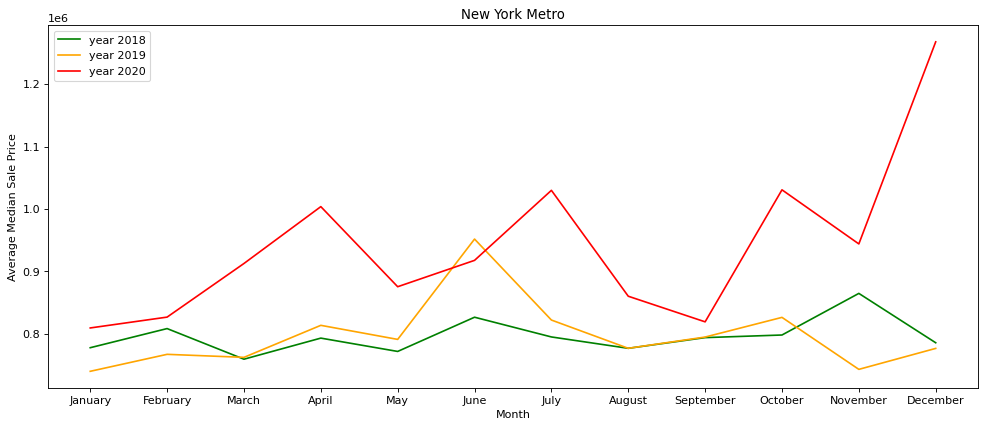

In [9]:
# plot average median price for NY metro area by year and month
ny_city_county_df['year'] = pd.DatetimeIndex(ny_city_county_df['period_begin']).year
ny_city_county_df['month'] = pd.DatetimeIndex(ny_city_county_df['period_begin']).month_name()
ny_city_county_df['month_int'] = pd.DatetimeIndex(ny_city_county_df['period_begin']).month

groupbyyearmonth = ny_city_county_df.groupby(['year','month', 'month_int'])
groupby_df = groupbyyearmonth.mean()
ungroup_df = groupby_df.reset_index()

year2018 = ungroup_df.loc[ungroup_df['year']==2018]
year2018 = year2018.sort_values(by='month_int')
year2018 = year2018.reset_index(drop=True)

year2019 = ungroup_df.loc[ungroup_df['year']==2019]
year2019 = year2019.sort_values(by='month_int')
year2019 = year2019.reset_index(drop=True)

year2020 = ungroup_df.loc[ungroup_df['year']==2020]
year2020 = year2020.sort_values(by='month_int')
year2020 = year2020.reset_index(drop=True)

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

y2018 = plt.plot(year2018['month_int'], year2018['median_sale_price'],color='green')
y2019 = plt.plot(year2019['month_int'], year2019['median_sale_price'],color='orange')
y2020 = plt.plot(year2020['month_int'], year2020['median_sale_price'],color='red')


plt.xticks(year2018['month_int'],['January','February','March','April','May','June','July','August','September','October','November','December'])

plt.title('New York Metro')

plt.xlabel('Month')

plt.ylabel('Average Median Sale Price')

# plt.ylim(100000, 1400000, 100000)

plt.legend(['year 2018', 'year 2019','year 2020'], loc=2)

plt.savefig('NY Metro Average Median Sale Price.png')
plt.show()



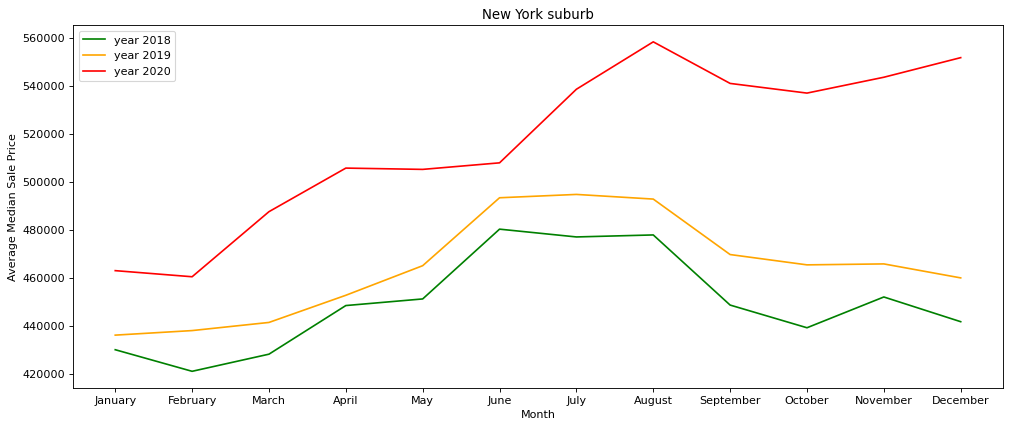

In [10]:
# plot average median price for NY suburb area by year and month
ny_suburb_county_df['year'] = pd.DatetimeIndex(ny_suburb_county_df['period_begin']).year
ny_suburb_county_df['month'] = pd.DatetimeIndex(ny_suburb_county_df['period_begin']).month_name()
ny_suburb_county_df['month_int'] = pd.DatetimeIndex(ny_suburb_county_df['period_begin']).month

groupbyyearmonth = ny_suburb_county_df.groupby(['year','month', 'month_int'])
groupby_df = groupbyyearmonth.mean()
ungroup_df = groupby_df.reset_index()

year2018 = ungroup_df.loc[ungroup_df['year']==2018]
year2018 = year2018.sort_values(by='month_int')
year2018 = year2018.reset_index(drop=True)

year2019 = ungroup_df.loc[ungroup_df['year']==2019]
year2019 = year2019.sort_values(by='month_int')
year2019 = year2019.reset_index(drop=True)

year2020 = ungroup_df.loc[ungroup_df['year']==2020]
year2020 = year2020.sort_values(by='month_int')
year2020 = year2020.reset_index(drop=True)

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

y2018 = plt.plot(year2018['month_int'], year2018['median_sale_price'],color='green')
y2019 = plt.plot(year2019['month_int'], year2019['median_sale_price'],color='orange')
y2020 = plt.plot(year2020['month_int'], year2020['median_sale_price'],color='red')


plt.xticks(year2018['month_int'],['January','February','March','April','May','June','July','August','September','October','November','December'])

plt.title('New York suburb')

plt.xlabel('Month')

plt.ylabel('Average Median Sale Price')
# plt.ylim(100000, 1400000, 100000)

plt.legend(['year 2018', 'year 2019','year 2020'], loc=2)
plt.savefig('NY Suburb Average Median Sale Price.png')
plt.show()

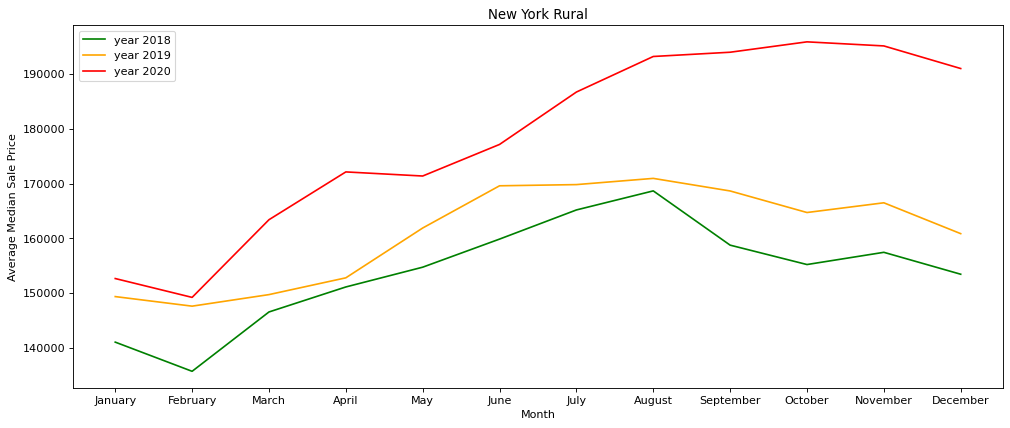

In [11]:
# plot average median price for NY rural area by year and month
ny_rural_county_df['year'] = pd.DatetimeIndex(ny_rural_county_df['period_begin']).year
ny_rural_county_df['month'] = pd.DatetimeIndex(ny_rural_county_df['period_begin']).month_name()
ny_rural_county_df['month_int'] = pd.DatetimeIndex(ny_rural_county_df['period_begin']).month

groupbyyearmonth = ny_rural_county_df.groupby(['year','month', 'month_int'])
groupby_df = groupbyyearmonth.mean()
ungroup_df = groupby_df.reset_index()

year2018 = ungroup_df.loc[ungroup_df['year']==2018]
year2018 = year2018.sort_values(by='month_int')
year2018 = year2018.reset_index(drop=True)

year2019 = ungroup_df.loc[ungroup_df['year']==2019]
year2019 = year2019.sort_values(by='month_int')
year2019 = year2019.reset_index(drop=True)

year2020 = ungroup_df.loc[ungroup_df['year']==2020]
year2020 = year2020.sort_values(by='month_int')
year2020 = year2020.reset_index(drop=True)

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

y2018 = plt.plot(year2018['month_int'], year2018['median_sale_price'],color='green')
y2019 = plt.plot(year2019['month_int'], year2019['median_sale_price'],color='orange')
y2020 = plt.plot(year2020['month_int'], year2020['median_sale_price'],color='red')


plt.xticks(year2018['month_int'],['January','February','March','April','May','June','July','August','September','October','November','December'])

plt.title('New York Rural')

plt.xlabel('Month')

plt.ylabel('Average Median Sale Price')
# plt.ylim(100000, 1400000, 100000)

plt.legend(['year 2018', 'year 2019','year 2020'], loc=2)
plt.savefig('NY Rural Average Median Sale Price.png')
plt.show()

In [12]:
##Add Rey's work


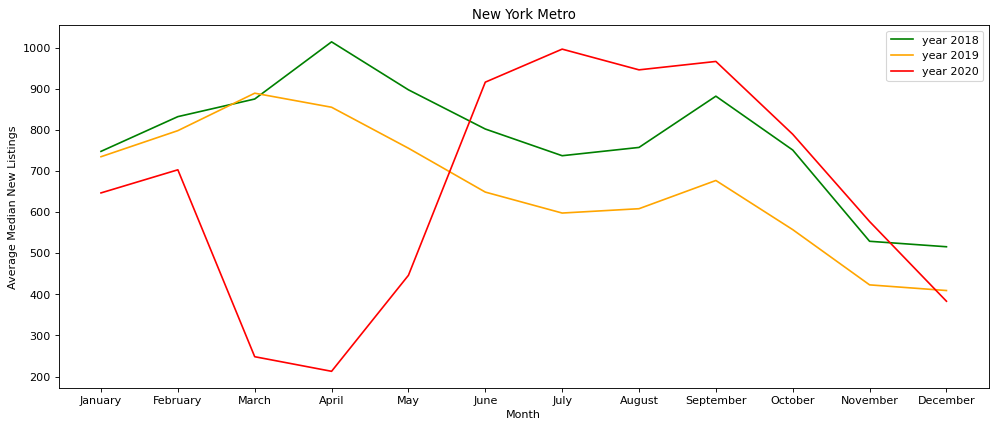

In [13]:
ny_city_county_df['year'] = pd.DatetimeIndex(ny_city_county_df['period_begin']).year
ny_city_county_df['month'] = pd.DatetimeIndex(ny_city_county_df['period_begin']).month_name()
ny_city_county_df['month_int'] = pd.DatetimeIndex(ny_city_county_df['period_begin']).month

groupbyyearmonth = ny_city_county_df.groupby(['year','month', 'month_int'])
groupby_df = groupbyyearmonth.mean()
ungroup_df = groupby_df.reset_index()

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

year2018 = ungroup_df.loc[ungroup_df['year']==2018]
year2018 = year2018.sort_values(by='month_int')
year2018 = year2018.reset_index(drop=True)

year2019 = ungroup_df.loc[ungroup_df['year']==2019]
year2019 = year2019.sort_values(by='month_int')
year2019 = year2019.reset_index(drop=True)

year2020 = ungroup_df.loc[ungroup_df['year']==2020]
year2020 = year2020.sort_values(by='month_int')
year2020 = year2020.reset_index(drop=True)

y2018 = plt.plot(year2018['month_int'], year2018['total_new_listings'], color = "green")
y2019 = plt.plot(year2019['month_int'], year2019['total_new_listings'], color = "orange")
y2020 = plt.plot(year2020['month_int'], year2020['total_new_listings'], color = "red")

         
plt.xticks(year2018['month_int'],['January','February','March','April','May','June','July','August','September','October','November','December'])

plt.title('New York Metro')

plt.xlabel('Month')

plt.ylabel('Average Median New Listings')

plt.legend(['year 2018', 'year 2019','year 2020'], loc=1)

plt.savefig("NYC Metro Avg Median New Listing.png")

plt.show()

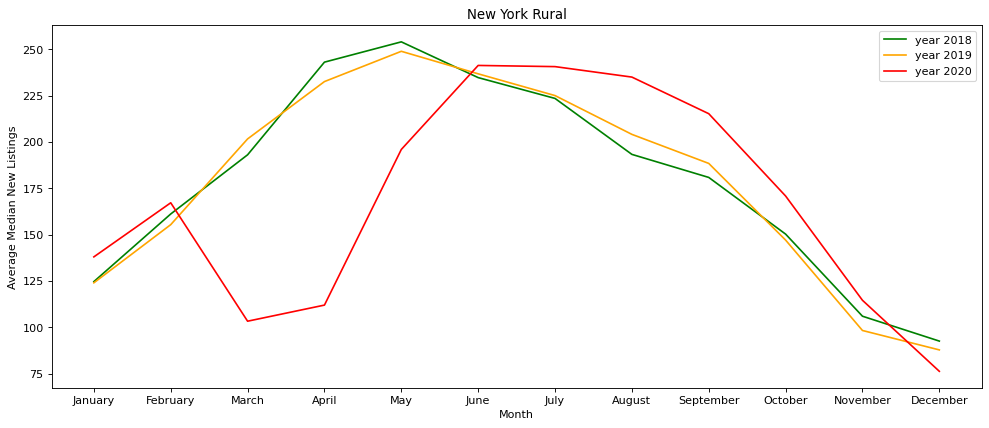

In [14]:
ny_rural_county_df['year'] = pd.DatetimeIndex(ny_rural_county_df['period_begin']).year
ny_rural_county_df['month'] = pd.DatetimeIndex(ny_rural_county_df['period_begin']).month_name()
ny_rural_county_df['month_int'] = pd.DatetimeIndex(ny_rural_county_df['period_begin']).month

groupbyyearmonth = ny_rural_county_df.groupby(['year','month', 'month_int'])
groupby_df = groupbyyearmonth.mean()
ungroup_df = groupby_df.reset_index()

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

year2018 = ungroup_df.loc[ungroup_df['year']==2018]
year2018 = year2018.sort_values(by='month_int')
year2018 = year2018.reset_index(drop=True)

year2019 = ungroup_df.loc[ungroup_df['year']==2019]
year2019 = year2019.sort_values(by='month_int')
year2019 = year2019.reset_index(drop=True)

year2020 = ungroup_df.loc[ungroup_df['year']==2020]
year2020 = year2020.sort_values(by='month_int')
year2020 = year2020.reset_index(drop=True)

y2018 = plt.plot(year2018['month_int'], year2018['total_new_listings'], color = "green")
y2019 = plt.plot(year2019['month_int'], year2019['total_new_listings'], color = "orange")
y2020 = plt.plot(year2020['month_int'], year2020['total_new_listings'], color = "red")

plt.xticks(year2018['month_int'],['January','February','March','April','May','June','July','August','September','October','November','December'])

plt.title('New York Rural')

plt.xlabel('Month')

plt.ylabel('Average Median New Listings')

plt.legend(['year 2018', 'year 2019','year 2020'], loc=1)

plt.savefig("NYC Rural Avg Median New Listing.png")

plt.show()

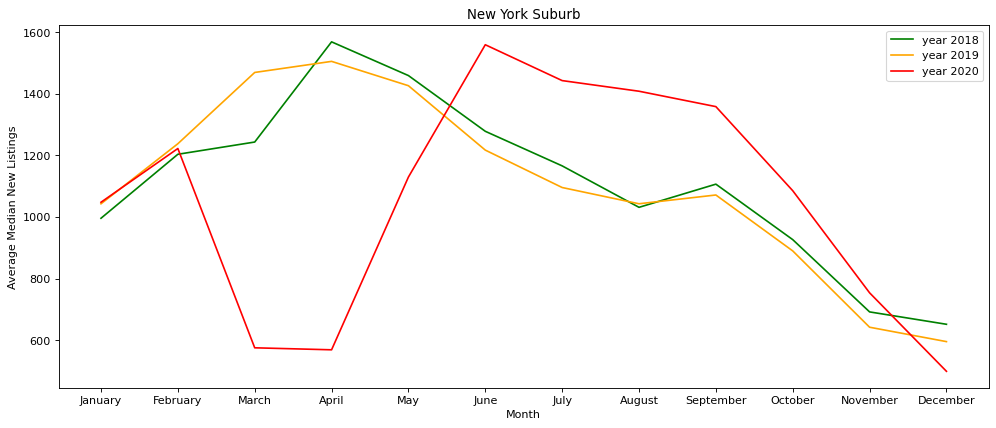

In [15]:
ny_suburb_county_df['year'] = pd.DatetimeIndex(ny_suburb_county_df['period_begin']).year
ny_suburb_county_df['month'] = pd.DatetimeIndex(ny_suburb_county_df['period_begin']).month_name()
ny_suburb_county_df['month_int'] = pd.DatetimeIndex(ny_suburb_county_df['period_begin']).month

groupbyyearmonth = ny_suburb_county_df.groupby(['year','month', 'month_int'])
groupby_df = groupbyyearmonth.mean()
ungroup_df = groupby_df.reset_index()

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

year2018 = ungroup_df.loc[ungroup_df['year']==2018]
year2018 = year2018.sort_values(by='month_int')
year2018 = year2018.reset_index(drop=True)

year2019 = ungroup_df.loc[ungroup_df['year']==2019]
year2019 = year2019.sort_values(by='month_int')
year2019 = year2019.reset_index(drop=True)

year2020 = ungroup_df.loc[ungroup_df['year']==2020]
year2020 = year2020.sort_values(by='month_int')
year2020 = year2020.reset_index(drop=True)

y2018 = plt.plot(year2018['month_int'], year2018['total_new_listings'], color = "green")
y2019 = plt.plot(year2019['month_int'], year2019['total_new_listings'], color = "orange")
y2020 = plt.plot(year2020['month_int'], year2020['total_new_listings'], color = "red")


plt.xticks(year2018['month_int'],['January','February','March','April','May','June','July','August','September','October','November','December'])

plt.title('New York Suburb')

plt.xlabel('Month')

plt.ylabel('Average Median New Listings')

plt.legend(['year 2018', 'year 2019','year 2020'], loc=1)

plt.savefig("NYC Suburb Avg Median New Listing.png")

plt.show()

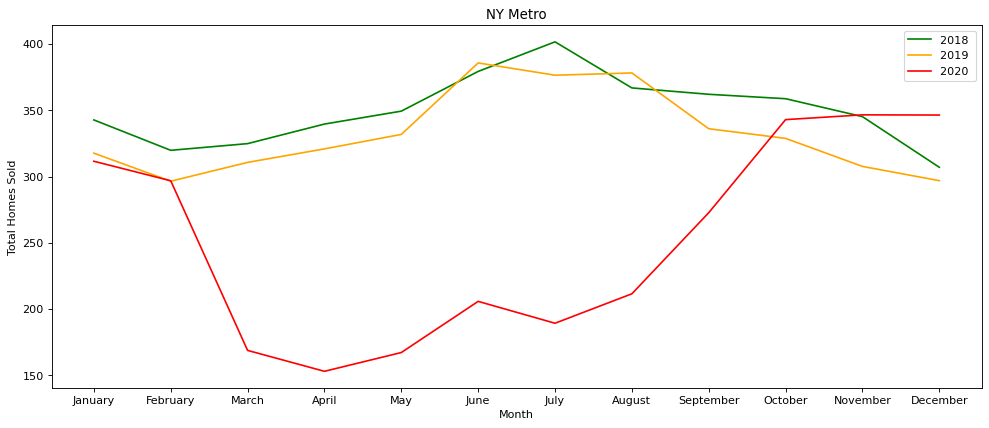

In [19]:
#Ben's code
nyc_county = ny_city_county_df[['region_name', 'region_type','period_begin', 'period_end', 'duration','total_homes_sold',
       'total_homes_sold_yoy', 'average_homes_sold', 'average_homes_sold_yoy',
       'total_homes_sold_with_price_drops',
       'total_homes_sold_with_price_drops_yoy','percent_active_listings_with_price_drops',
       'percent_active_listings_with_price_drops_yoy']]
nyc_county['year'] = pd.DatetimeIndex(nyc_county['period_begin']).year
nyc_county['month'] = pd.DatetimeIndex(nyc_county['period_begin']).month_name()
nyc_county['month_int'] = pd.DatetimeIndex(nyc_county['period_begin']).month
group_year_nyc = nyc_county.groupby(['year', 'month', 'month_int'])
groupby_nyc = group_year_nyc.mean()
ungroup_nyc = groupby_nyc.reset_index()


nyc2018 = ungroup_nyc.loc[ungroup_nyc['year']==2018]
nyc2018 = nyc2018.sort_values(by= 'month_int')
nyc2018 = nyc2018.reset_index(drop=True)

nyc2019 = ungroup_nyc.loc[ungroup_nyc['year']==2019]
nyc2019 = nyc2019.sort_values(by= 'month_int')
nyc2019 = nyc2019.reset_index(drop=True)

nyc2020 = ungroup_nyc.loc[ungroup_nyc['year']==2020]
nyc2020 = nyc2020.sort_values(by= 'month_int')
nyc2020 = nyc2020.reset_index(drop=True)

nyc2018_x = nyc2018["month"]
nyc2018_y = nyc2018["total_homes_sold"]

nyc2019_x = nyc2019["month"]
nyc2019_y = nyc2019["total_homes_sold"]

nyc2020_x = nyc2020["month"]
nyc2020_y = nyc2020["total_homes_sold"]

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(nyc2018_x, nyc2018_y, color = 'green', label = '2018 ')
plt.plot(nyc2019_x, nyc2019_y, color = 'orange', label = '2019 ')
plt.plot(nyc2020_x, nyc2020_y, color = 'red', label = '2020 ')
plt.title("NY Metro")
plt.xlabel("Month")
plt.ylabel("Total Homes Sold")
plt.legend(loc="best")
plt.savefig("NYMetro_homes_sold.png")
plt.show()


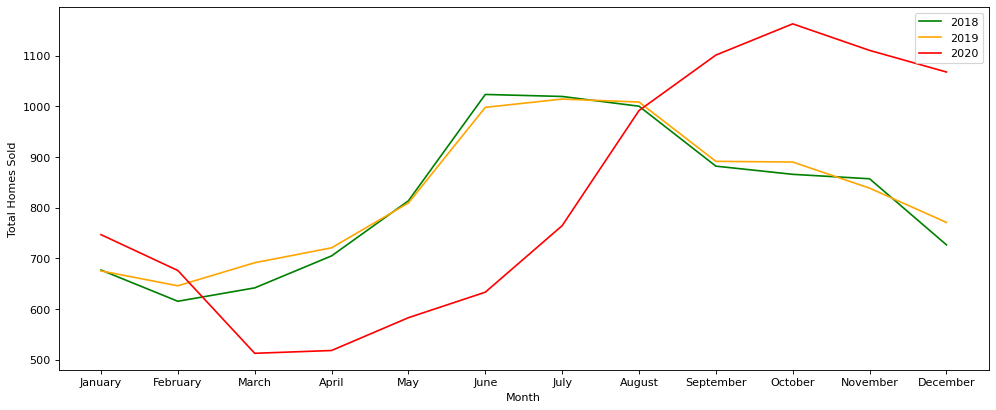

In [20]:
#Ben's code
ny_suburbs = ny_suburb_county_df[['region_name', 'region_type','period_begin', 'period_end', 'duration','total_homes_sold',
       'total_homes_sold_yoy', 'average_homes_sold', 'average_homes_sold_yoy',
       'total_homes_sold_with_price_drops',
       'total_homes_sold_with_price_drops_yoy','percent_active_listings_with_price_drops',
       'percent_active_listings_with_price_drops_yoy']]
ny_suburbs['year'] = pd.DatetimeIndex(ny_suburbs['period_begin']).year
ny_suburbs['month'] = pd.DatetimeIndex(ny_suburbs['period_begin']).month_name()
ny_suburbs['month_int'] = pd.DatetimeIndex(ny_suburbs['period_begin']).month
group_year_suburbs = ny_suburbs.groupby(['year', 'month', 'month_int'])
groupby_nysuburb = group_year_suburbs.mean()
ungroup_nysuburb = groupby_nysuburb.reset_index()

nysuburbs2018 = ungroup_nysuburb.loc[ungroup_nysuburb['year']==2018]
nysuburbs2018 = nysuburbs2018.sort_values(by= 'month_int')
nysuburbs2018 = nysuburbs2018.reset_index(drop=True)

nysuburbs2019 = ungroup_nysuburb.loc[ungroup_nysuburb['year']==2019]
nysuburbs2019 = nysuburbs2019.sort_values(by= 'month_int')
nysuburbs2019 = nysuburbs2019.reset_index(drop=True)

nysuburbs2020 = ungroup_nysuburb.loc[ungroup_nysuburb['year']==2020]
nysuburbs2020 = nysuburbs2020.sort_values(by= 'month_int')
nysuburbs2020 = nysuburbs2020.reset_index(drop=True)

nysuburbs2018_x = nysuburbs2018["month"]
nysuburbs2018_y = nysuburbs2018["total_homes_sold"]

nysuburbs2019_x = nysuburbs2019["month"]
nysuburbs2019_y = nysuburbs2019["total_homes_sold"]

nysuburbs2020_x = nysuburbs2020["month"]
nysuburbs2020_y = nysuburbs2020["total_homes_sold"]

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(nysuburbs2018_x, nysuburbs2018_y, color = 'green', label = '2018')
plt.plot(nysuburbs2019_x, nysuburbs2019_y, color = 'orange', label = '2019')
plt.plot(nysuburbs2020_x, nysuburbs2020_y, color = 'red', label = '2020')
plt.xlabel("Month")
plt.ylabel("Total Homes Sold")
plt.legend(loc="best")
plt.savefig("NYSuburbs_homes_sold.png")
plt.show()

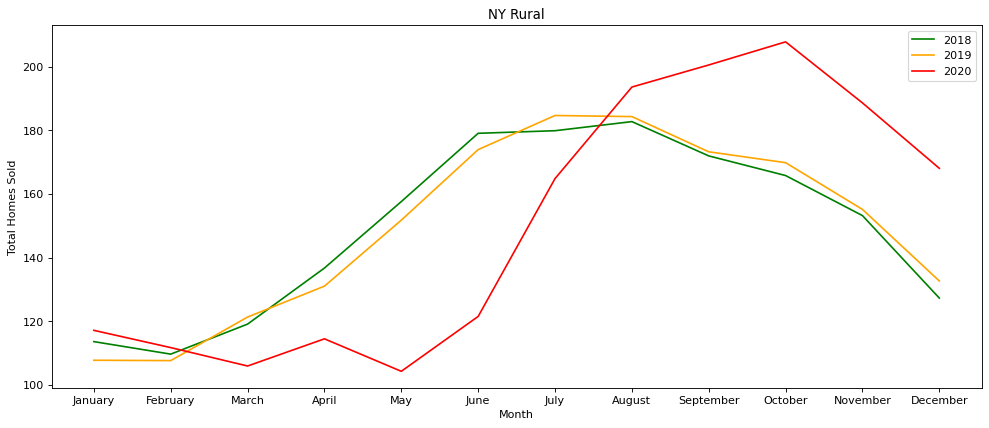

In [21]:
#Ben's code
ny_rural = ny_rural_county_df[['region_name', 'region_type','period_begin', 'period_end', 'duration','total_homes_sold',
       'total_homes_sold_yoy', 'average_homes_sold', 'average_homes_sold_yoy',
       'total_homes_sold_with_price_drops',
       'total_homes_sold_with_price_drops_yoy','percent_active_listings_with_price_drops',
       'percent_active_listings_with_price_drops_yoy']]
ny_rural['year'] = pd.DatetimeIndex(ny_rural['period_begin']).year
ny_rural['month'] = pd.DatetimeIndex(ny_rural['period_begin']).month_name()
ny_rural['month_int'] = pd.DatetimeIndex(ny_rural['period_begin']).month
group_year_rural = ny_rural.groupby(['year', 'month', 'month_int'])
groupby_nyrural = group_year_rural.mean()
ungroup_nyrural = groupby_nyrural.reset_index()

nyrural2018 = ungroup_nyrural.loc[ungroup_nysuburb['year']==2018]
nyrural2018 = nyrural2018.sort_values(by= 'month_int')
nyrural2018 = nyrural2018.reset_index(drop=True)

nyrural2019 = ungroup_nyrural.loc[ungroup_nysuburb['year']==2019]
nyrural2019 = nyrural2019.sort_values(by= 'month_int')
nyrural2019 = nyrural2019.reset_index(drop=True)

nyrural2020 = ungroup_nyrural.loc[ungroup_nysuburb['year']==2020]
nyrural2020 = nyrural2020.sort_values(by= 'month_int')
nyrural2020 = nyrural2020.reset_index(drop=True)

nyrural2018_x = nyrural2018["month"]
nyrural2018_y = nyrural2018["total_homes_sold"]

nyrural2019_x = nyrural2019["month"]
nyrural2019_y = nyrural2019["total_homes_sold"]

nyrural2020_x = nyrural2020["month"]
nyrural2020_y = nyrural2020["total_homes_sold"]


plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(nyrural2018_x, nyrural2018_y, color = 'green', label = '2018')
plt.plot(nyrural2019_x, nyrural2019_y, color = 'orange', label = '2019')
plt.plot(nyrural2020_x, nyrural2020_y, color = 'red', label = '2020')
plt.title("NY Rural")
plt.xlabel("Month")
plt.ylabel("Total Homes Sold")
plt.legend(loc="best")
plt.savefig("NYRural_homes_sold.png")
plt.show()